
---
#### Datos Demográficos:

1. **Edad (`age`)**: Edad en años.
2. **Sexo (`sex`)**: Representado por 0 para hombres y 1 para mujeres.

#### Relacionadas con Síntomas y Diagnóstico:

1. **Tipo de Dolor en el Pecho (`cp`)**:
    - 0: Typical Angina
    - 1: Atypical Angina
    - 2: Non-anginal Pain
    - 3: Asymptomatic
2. **Presión Arterial en Reposo (`trestbps`)**: Medida en mm Hg al ingreso al hospital.
3. **Colesterol Sérico (`chol`)**: Medido en mg/dl.

#### Tests Médicos:

1. **Azúcar en Sangre en Ayunas (`fbs`)**:
    - 1: >120 mg/dl
    - 0: <120 mg/dl
2. **Resultados Electrocardiográficos en Reposo (`restecg`)**:
    - 0: Normal
    - 1: Anomalía de la onda ST-T
    - 2: Muestra hipertrofia ventricular izquierda probable o definitiva.
3. **Ritmo Cardíaco Máximo (`thalach`)**: Máximo alcanzado durante el test.

#### Otros Factores:

1. **Angina Inducida por Ejercicio (`exang`)**:
    - 1: Sí
    - 0: No
2. **Depresión ST (`oldpeak`)**: Inducida por el ejercicio en relación al descanso.
3. **Pendiente del Segmento de Ejercicio ST (`slope`)**:
    - 0: Ascendente
    - 1: Plano
    - 2: Descendente
4. **Número de Vasos Principales (`ca`)**: 0-3, coloreados por fluoroscopia.
5. **Resultado de Test de Thalio (`thal`)**:
    - 3: Normal
    - 6: Defecto fijo
    - 7: Defecto reversible

#### Variable Objetivo:

1. **Diagnóstico de Enfermedad Cardíaca (`target`)**:
    - 0: <50% de diámetro de estrechamiento.
    - 1: >50% de diámetro de estrechamiento.

---


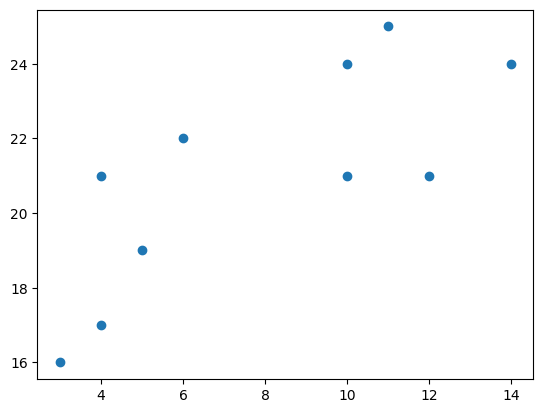

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

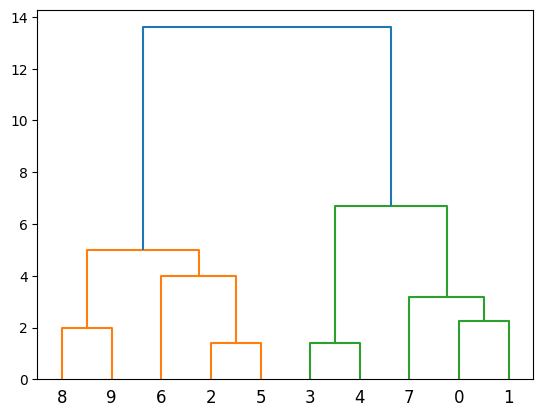

In [ ]:


from scipy.cluster.hierarchy import dendrogram, linkage

# Datos
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))

# Clasificación jerárquica con enlace simple
linkage_data = linkage(data, method='complete', metric='euclidean')

# Generación del dendrograma
dendrogram(linkage_data)

# Mostrar la gráfica
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


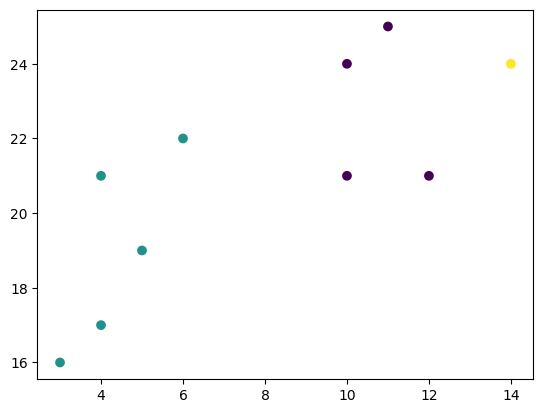

In [ ]:
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))


hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

In [ ]:
#Importación de las librerías de interés
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import scipy.stats                # statistics

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import complete, fcluster #Cluster Jerarquico Completo

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Ruta al archivo CSV en Google Drive
ruta_archivo = '/content/drive/My Drive/heart.csv'

# Leer el archivo CSV con pandas
df = pd.read_csv(ruta_archivo)

# Visualizar las primeras filas del DataFrame
print(df.head())

Mounted at /content/drive
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='oldpeak', ylabel='Count'>

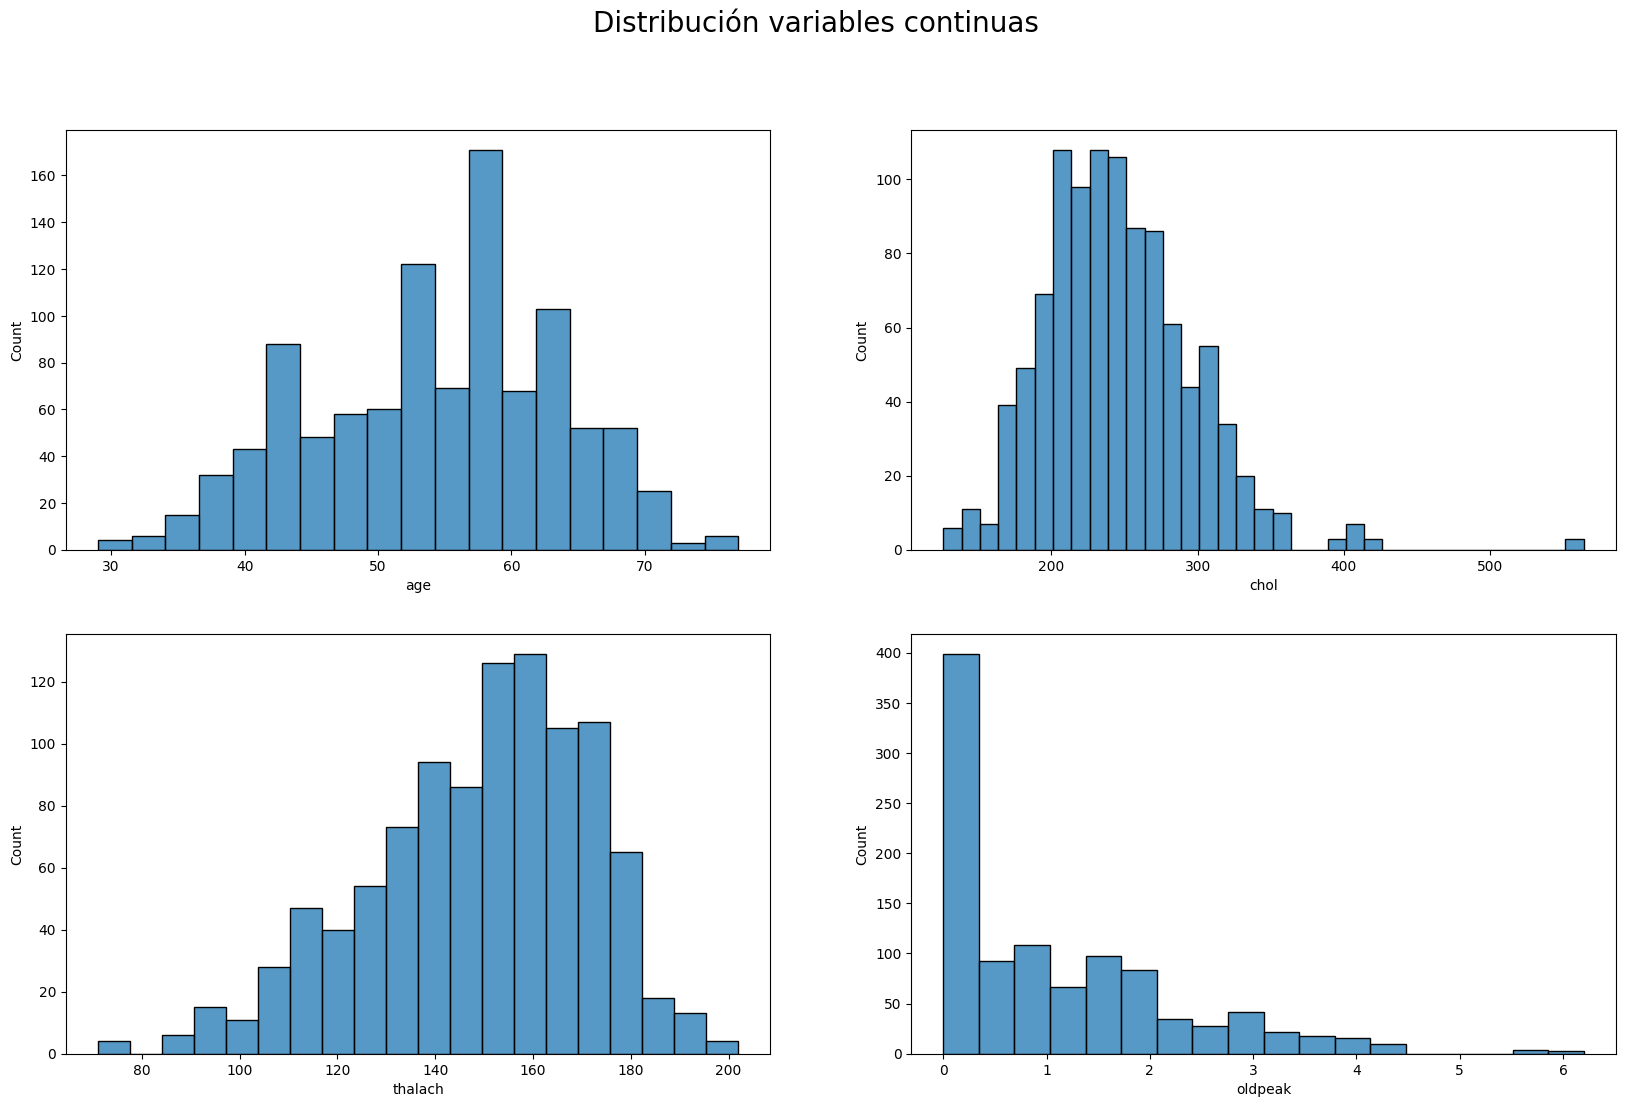

In [ ]:
f, axes = plt.subplots(2,2, figsize=(20, 12))
f.suptitle("Distribución variables continuas", fontsize=20)
sns.histplot( df["age"], ax=axes[0,0])
sns.histplot( df["chol"], ax=axes[0,1])
sns.histplot( df["thalach"], ax=axes[1,0])
sns.histplot( df["oldpeak"], ax=axes[1,1])

<ipython-input-40-b479efc20bc5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


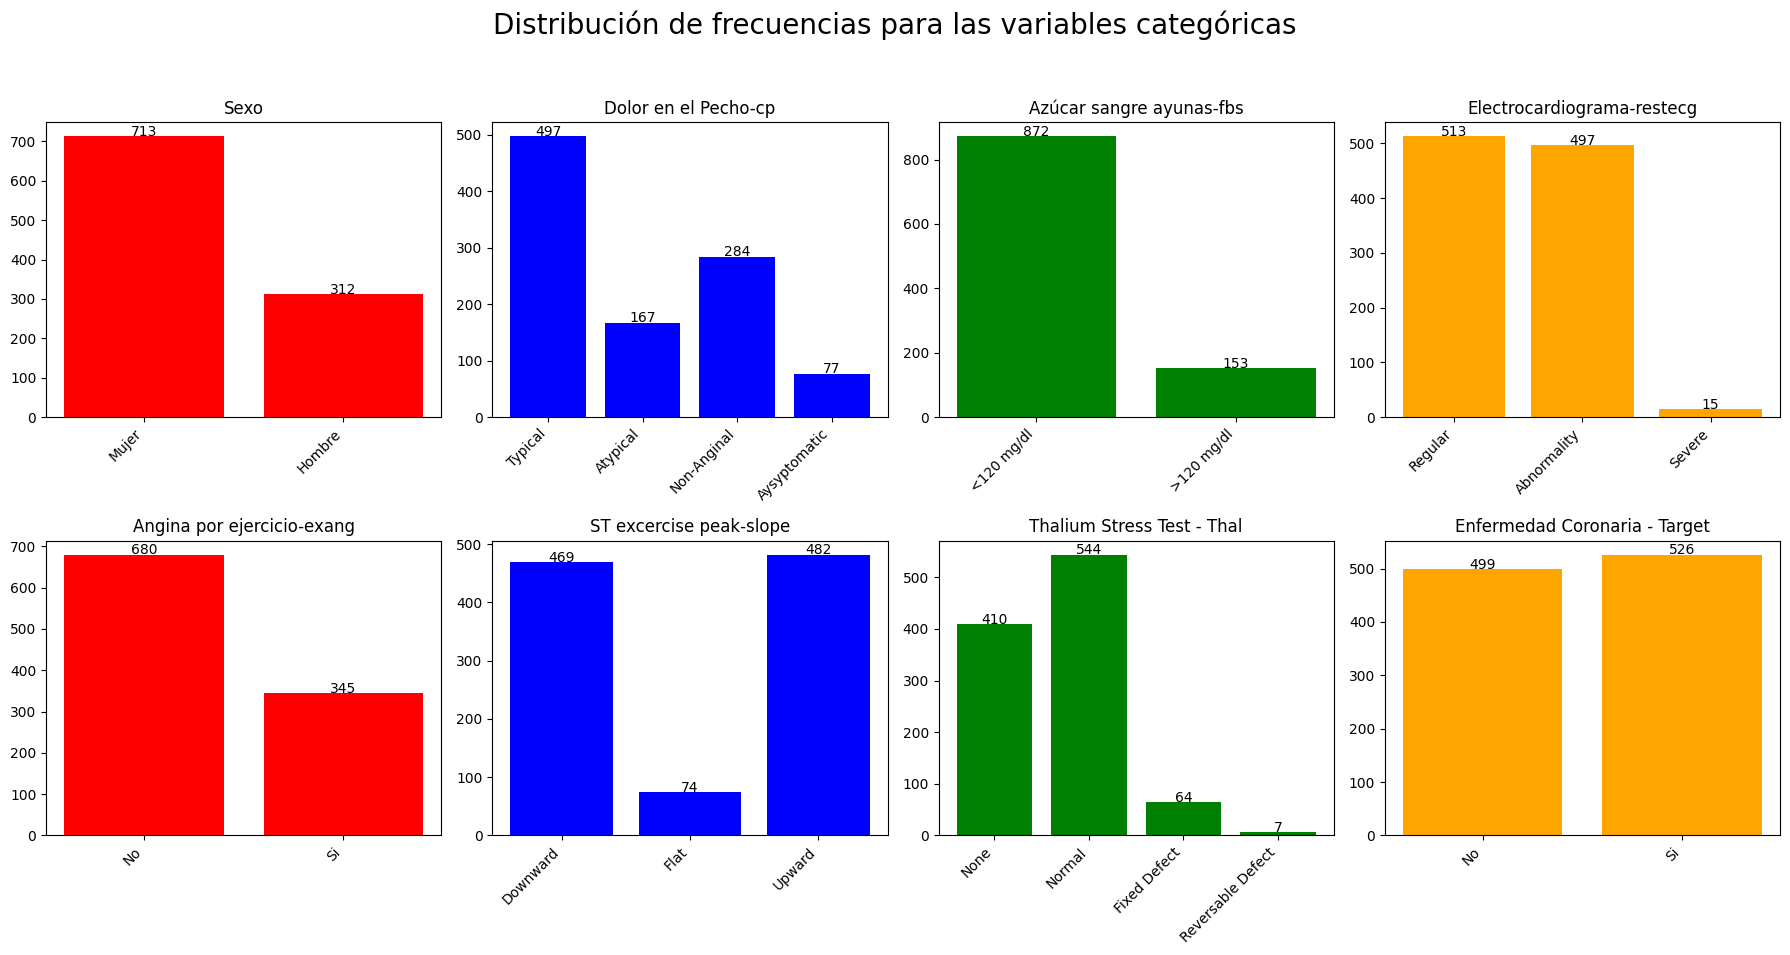

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
fig.suptitle("Distribución de frecuencias para las variables categóricas", fontsize=20)

# Diccionario de colores
colors = ['red', 'blue', 'green', 'orange']

# Función para crear barras
def create_bar(ax, x, y, title, color):
    ax.bar(x, y, color=color)
    ax.set_title(title, fontsize=12)
    for i, v in enumerate(y):
        ax.text(i, v + 0.5, str(v), ha='center')

# Ploteo de datos
create_bar(axes[0][0], ['Mujer', 'Hombre'], df.sex.value_counts(sort=False).values, 'Sexo', colors[0])
create_bar(axes[0][1], ['Typical', 'Atypical', 'Non-Anginal', 'Aysyptomatic'], df.cp.value_counts(sort=False).values, 'Dolor en el Pecho-cp', colors[1])
create_bar(axes[0][2], ['<120 mg/dl', '>120 mg/dl'], df.fbs.value_counts(sort=False).values, 'Azúcar sangre ayunas-fbs', colors[2])
create_bar(axes[0][3], ['Regular', 'Abnormality', 'Severe'], df.restecg.value_counts(sort=False).values, 'Electrocardiograma-restecg', colors[3])

create_bar(axes[1][0], ['No', 'Si'], df.exang.value_counts(sort=False).values, 'Angina por ejercicio-exang', colors[0])
create_bar(axes[1][1], ['Downward', 'Flat', 'Upward'], df.slope.value_counts(sort=False).values, 'ST excercise peak-slope', colors[1])
create_bar(axes[1][2], ['None', 'Normal', 'Fixed Defect', 'Reversable Defect'], df.thal.value_counts(sort=False).values, 'Thalium Stress Test - Thal', colors[2])
create_bar(axes[1][3], ['No', 'Si'], df.target.value_counts(sort=False).values, 'Enfermedad Coronaria - Target', colors[3])

# Rotación de las etiquetas en el eje X y ajuste del layout
for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<ipython-input-9-13977cd28c3a>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


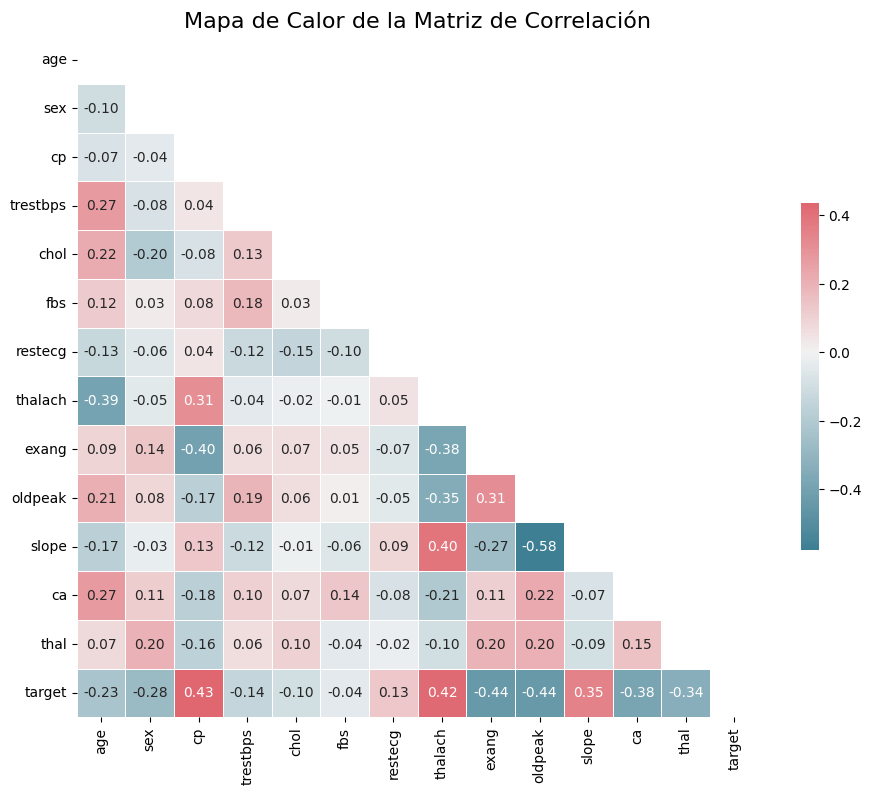

In [ ]:
# Calcula la matriz de correlación
corr = df.corr()

# Genera una máscara para el triángulo superior
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Configura la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Genera una paleta de colores divergente personalizada
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Añade un título al gráfico
ax.set_title('Mapa de Calor de la Matriz de Correlación', fontsize=16)

# Dibuja el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(
    corr,                      # Datos
    mask=mask,                  # Máscara para triángulo superior
    cmap=cmap,                  # Paleta de colores
    center=0,                   # Centro de la paleta de colores
    square=True,                # Celdas cuadradas
    linewidths=.5,              # Ancho de las líneas entre celdas
    cbar_kws={"shrink": .5},    # Tamaño de la barra de color
    annot=True,                 # Anotaciones
    fmt=".2f"                   # Formato de las anotaciones
)

plt.show()


In [ ]:
#creamos variables categoricas separadas y quitamos una para no generar problemas de multicolinealidad
df_dum=pd.get_dummies(df,columns=["sex","cp","fbs","restecg","exang","slope","thal","target"],drop_first=True)
df_dum.describe()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target_1
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146,0.695610,0.162927,0.277073,0.075122,0.149268,0.500488,0.014634,0.336585,0.470244,0.457561,0.062439,0.530732,0.400000,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798,0.460373,0.369479,0.447771,0.263717,0.356527,0.500244,0.120142,0.472772,0.499357,0.498439,0.242069,0.499298,0.490137,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
heart_scale = df_dum
scaler = preprocessing.StandardScaler()
columns =df_dum.columns
heart_scale[columns] = scaler.fit_transform(heart_scale[columns])
heart_scale.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target_1
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,1.209221,0.661504,-0.441179,-0.619085,-0.284998,-0.418878,0.999025,-0.121867,-0.712287,-0.942158,1.088807,-0.258065,-1.063474,1.224745,-1.026698
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,-0.731971,0.661504,-0.441179,-0.619085,-0.284998,2.387330,-1.000976,-0.121867,1.403928,-0.942158,-0.918436,-0.258065,-1.063474,1.224745,-1.026698
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,-0.731971,0.661504,-0.441179,-0.619085,-0.284998,-0.418878,0.999025,-0.121867,1.403928,-0.942158,-0.918436,-0.258065,-1.063474,1.224745,-1.026698
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0.238625,0.661504,-0.441179,-0.619085,-0.284998,-0.418878,0.999025,-0.121867,-0.712287,-0.942158,1.088807,-0.258065,-1.063474,1.224745,-1.026698
4,0.834359,0.364875,0.930822,-1.874977,0.705408,2.179817,-1.511706,-0.441179,-0.619085,-0.284998,2.387330,0.999025,-0.121867,-0.712287,1.061393,-0.918436,-0.258065,0.940314,-0.816497,-1.026698


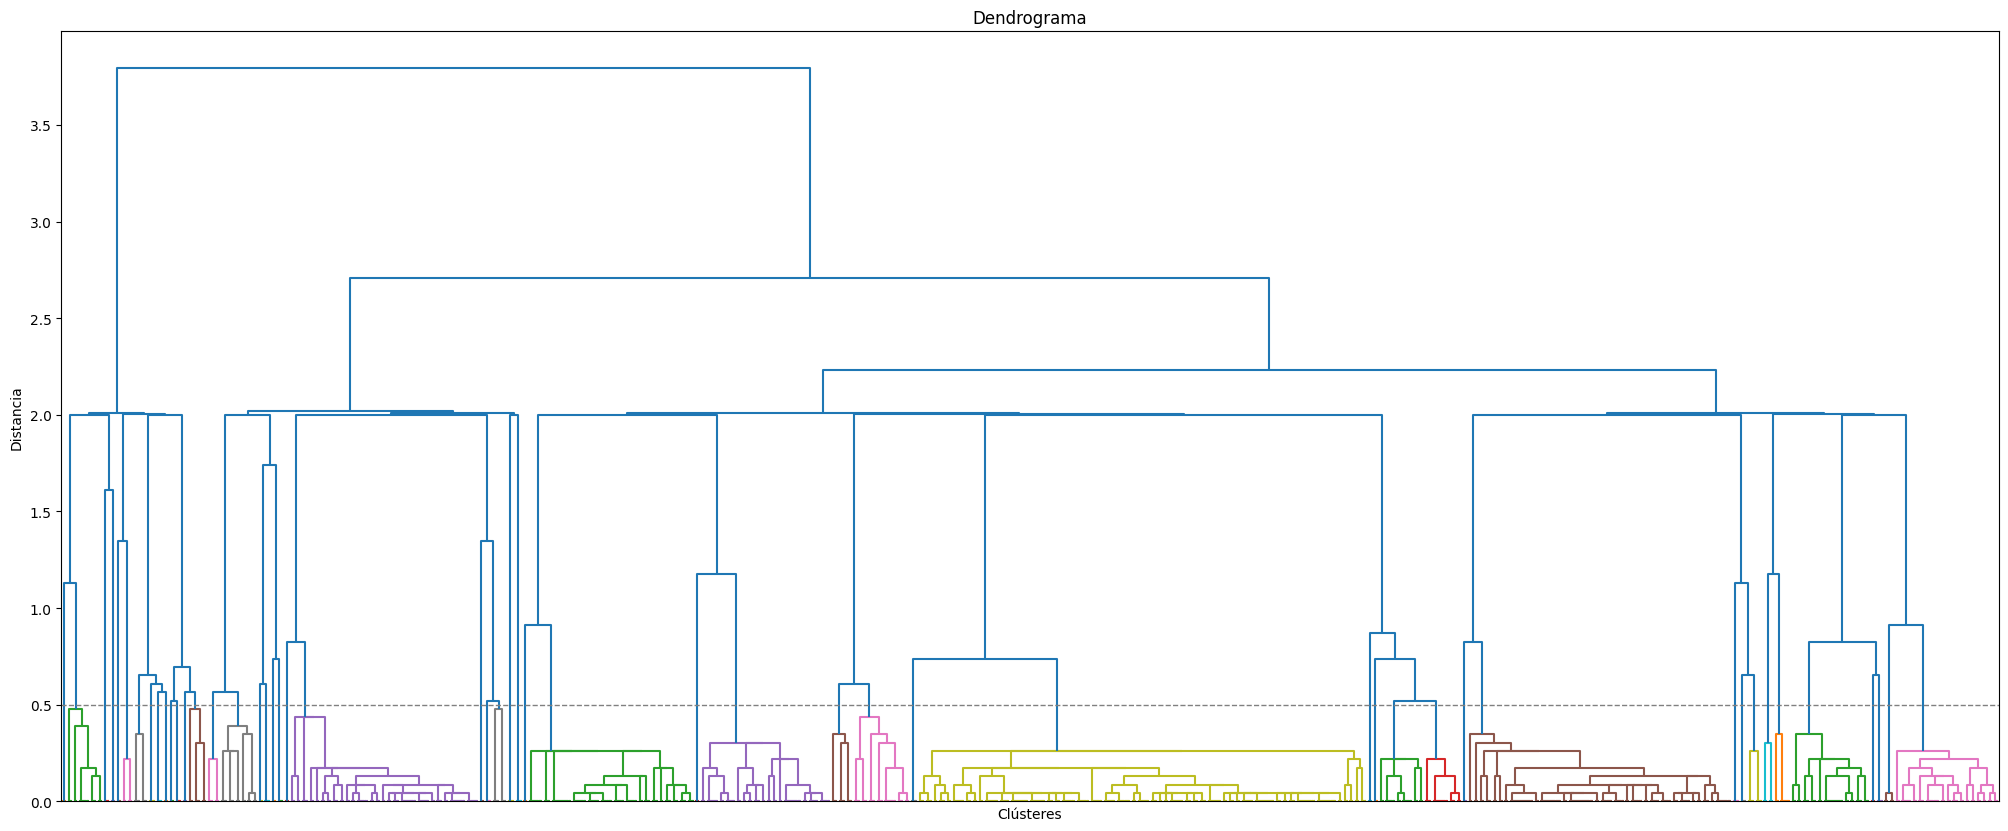

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Datos de ejemplo, remplazar con heart_scale y las columnas seleccionadas
Z = linkage(heart_scale.loc[:, ["thalach","cp_1","cp_2","cp_3","target_1","slope_1","slope_2"]], 'single', metric='euclidean')

# Configurar tamaño de figura
fig = plt.figure(figsize=(25, 10))

# Generar dendrograma con configuraciones adicionales
dn = dendrogram(
    Z,
    color_threshold=0.5,  # Umbral de coloración
    leaf_font_size=0.,  # Tamaño de fuente para etiquetas de hojas, 0 para omitir
    orientation='top',  # Orientación
    no_labels=True,  # Omitir etiquetas de hojas
)

# Agregar línea de corte
plt.axhline(y=0.5, c='grey', lw=1, linestyle='dashed')

# Configuración de títulos y etiquetas
plt.title('Dendrograma')
plt.xlabel('Clústeres')
plt.ylabel('Distancia')

# Guardar en alta resolución
plt.savefig('dendrograma_sin_etiquetas.png', dpi=300)

# Mostrar figura
plt.show()




In [ ]:
h_cluster=df.copy()
h_cluster['4_clust']=fcluster(Z,t=4, criterion='distance')
h_cluster.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,4_clust
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1
